Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [2]:
cf= pd.read_csv("./data/california_cities.csv")
cf

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:



1.  Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)

In [3]:
cf.area_water_percent.value_counts()/len(cf)*100

area_water_percent
0.00     25.103734
0.05      1.867220
0.01      1.659751
0.04      1.244813
0.10      1.244813
           ...    
0.84      0.207469
1.93      0.207469
1.09      0.207469
28.90     0.207469
0.53      0.207469
Name: count, Length: 220, dtype: float64

In [4]:
cf=cf.dropna()

In [5]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


C:\Users\victo\AppData\Local\Temp\ipykernel_26108\3811386414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cf["densidad_poblacional"] = cf["population_total"] / cf["area_total_km2"]


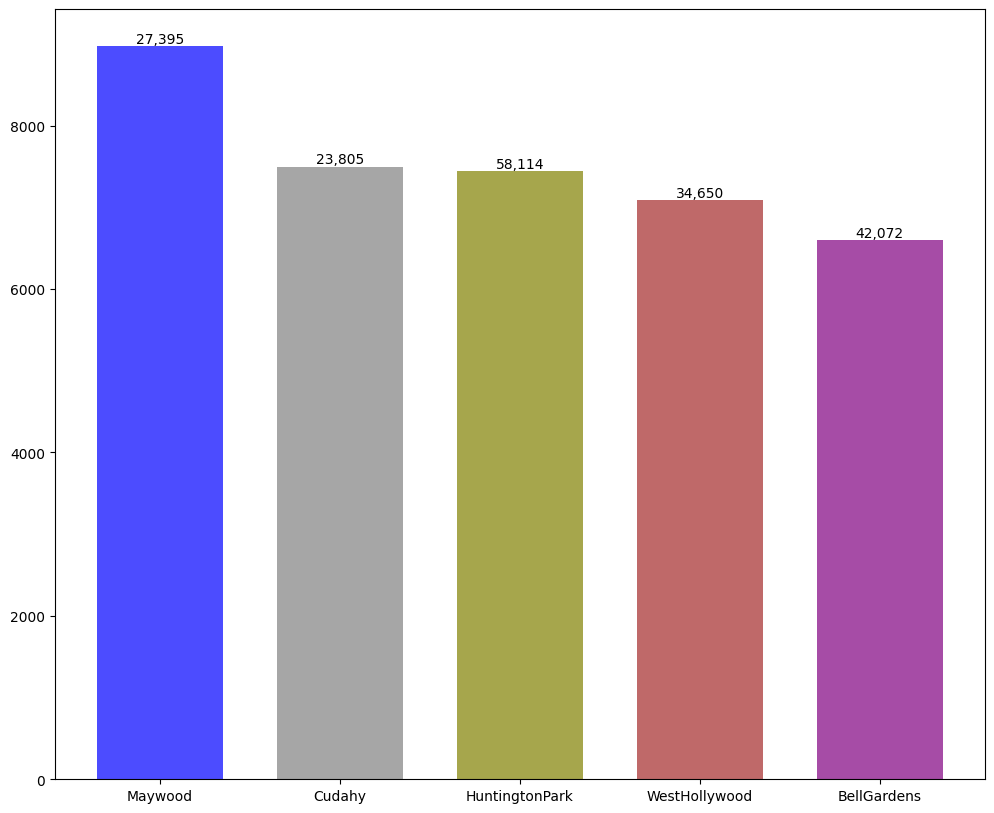

In [6]:


# Calcula la densidad poblacional
cf["densidad_poblacional"] = cf["population_total"] / cf["area_total_km2"]

# Ordena el dataframe por densidad poblacional
cf= cf.sort_values("densidad_poblacional", ascending=False).head(5)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12,10))

#colores
colores =["Blue","gray", "olive", "brown", "purple"]

# Crear barras
result = ax.bar(cf["city"], cf["densidad_poblacional"], color = colores, width=0.7, alpha =0.7)

# Añade el número de habitantes a cada barra, estableciendo la x en el centro de la barra y la y a la altura de la barra, centrando el texto y alinenado el mismo con la barra
for i, population in enumerate(cf['population_total']):
    bar = result[i]
    alturay = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, alturay, f'{population:,}', ha='center', va='bottom')


#configurar grafico
ax.set_xlabel=("ciudades")
ax.set_ylabel=("Densidad Poblacional (habitantes por km²)")
ax.set_title= ("ciudades mas pobladas de california")

# Muestra el gráfico
plt.show()

In [7]:
cf= pd.read_csv("./data/california_cities.csv")
cf

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

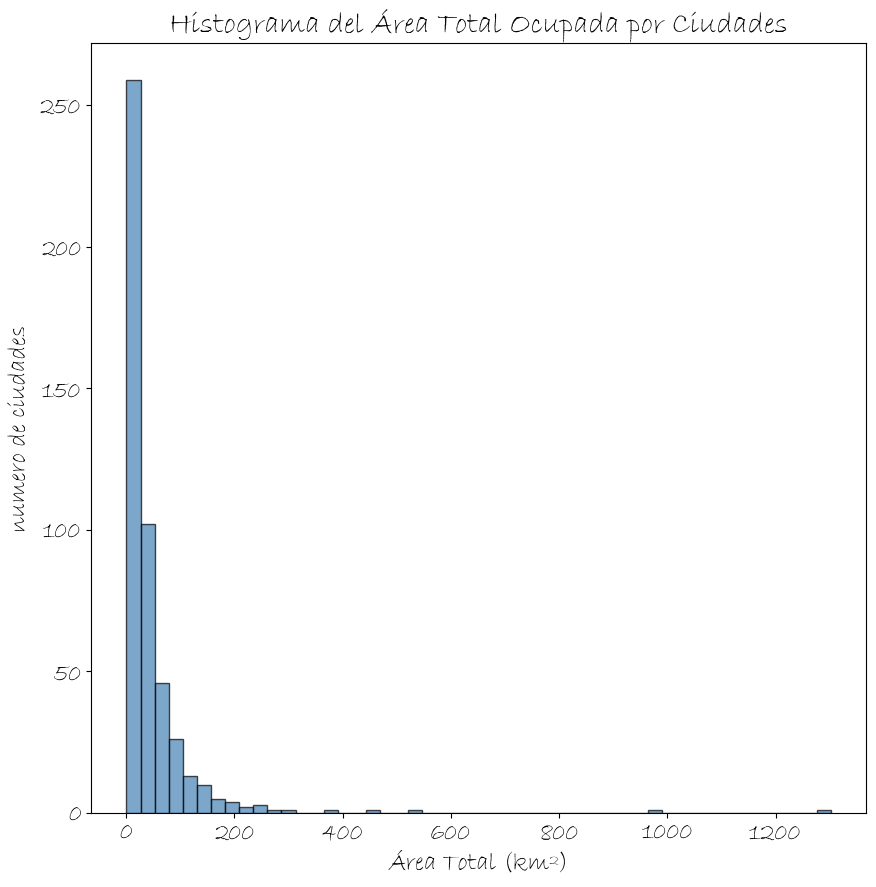

In [12]:
# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 10),dpi=100)

# Crear el histograma del área total ocupada por las ciudades
ax.hist(cf['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Configurar el gráfico
ax.set_xlabel('Área Total (km²)')
ax.set_ylabel('numero de ciudades')
ax.set_title('Histograma del Área Total Ocupada por Ciudades')

# Cambiar la fuente y el tamaño del texto
font = {'family': 'Bradley Hand ITC', 'size': 18}
plt.rc('font', **font)

# Mostrar el gráfico
plt.show()


3. El scatter de área de agua de un ciudad con su poblacion.

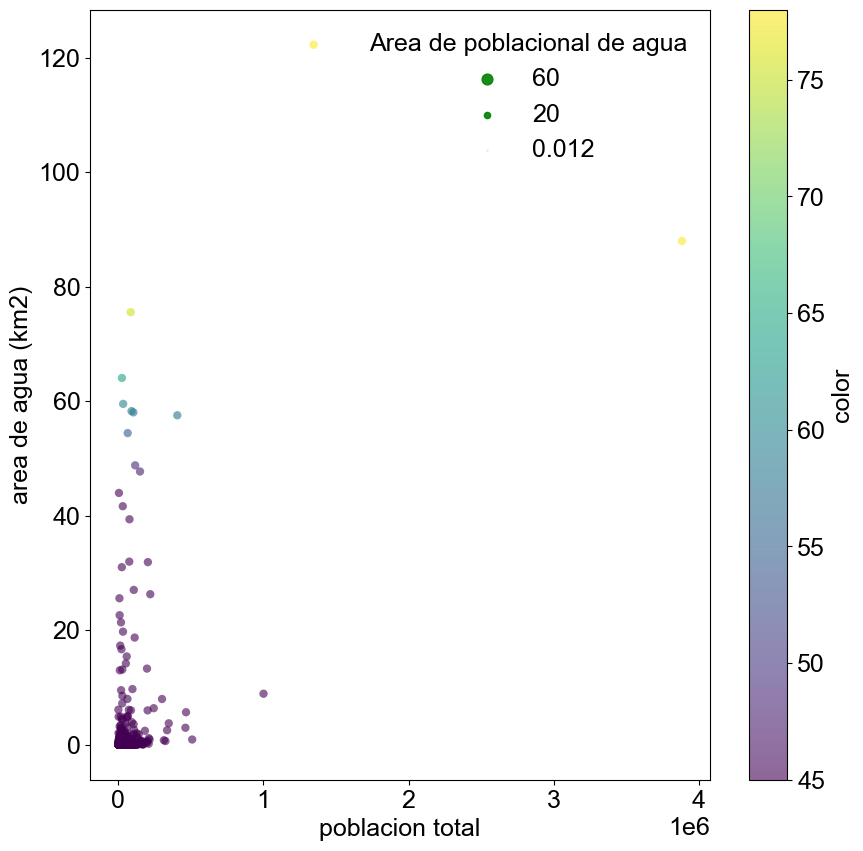

In [14]:
# Configurar el estilo de fuente
font_properties = {'family': 'Arial', 'weight': 'small', 'size': 8}
plt.rcParams['font.family'] = 'Arial'

#  outliers
y1=(10,100)  # Primer outlier
y2=(15 , 85)   # Segundo outlier

 #Dispersion, barra de colores
ciudad, agua = cf["population_total"], cf["area_water_km2"]

#creo la figura
plt.figure(figsize=(10,10), dpi=100)
sc=plt.scatter(ciudad, agua, c= cf.area_water_km2,  marker="o", cmap="viridis", linewidth = 0 , alpha = 0.6)

#establezvo las etiquetas
plt.xlabel("poblacion total")
plt.ylabel("area de agua (km2)")
plt.colorbar(sc, label="color")# el colorbar es la barra de colores que sale como una leyenda a la derecha cf.area_water_km2 acepta formulas en latex con markdown
plt.clim(45,78);# con esto se le pone el limite de colores que usara colorbar


# Fake legend
for agua in [60, 20, 0.012]:
    plt.scatter([],[], c ="g", alpha = 0.9, s =agua,label=str(agua))

plt.legend(frameon=False, title = "Area de poblacional de agua");

4. El boxplot de la altura de las ciudades.

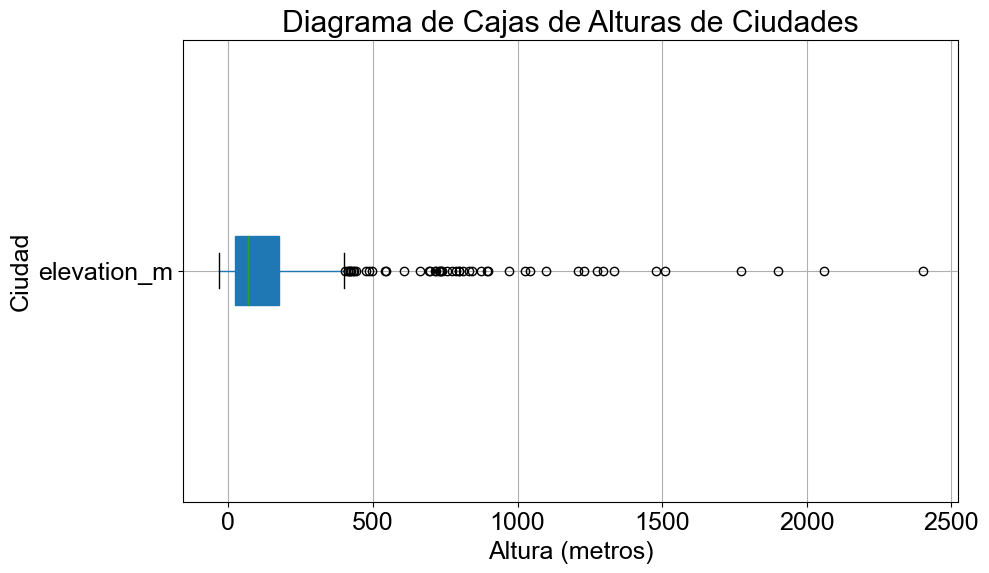

In [16]:
# Ajusta la resolución (dpi) según sea necesario
plt.figure(figsize=(10, 6), dpi=100)

# Utiliza el método boxplot de Pandas
cf.boxplot(column='elevation_m', vert=False, patch_artist=True)

# Ajusta el diseño del gráfico
plt.title('Diagrama de Cajas de Alturas de Ciudades')
plt.xlabel('Altura (metros)')
plt.ylabel('Ciudad')

# Muestra la gráfica
plt.show()

TypeError: 'Axes' object is not subscriptable

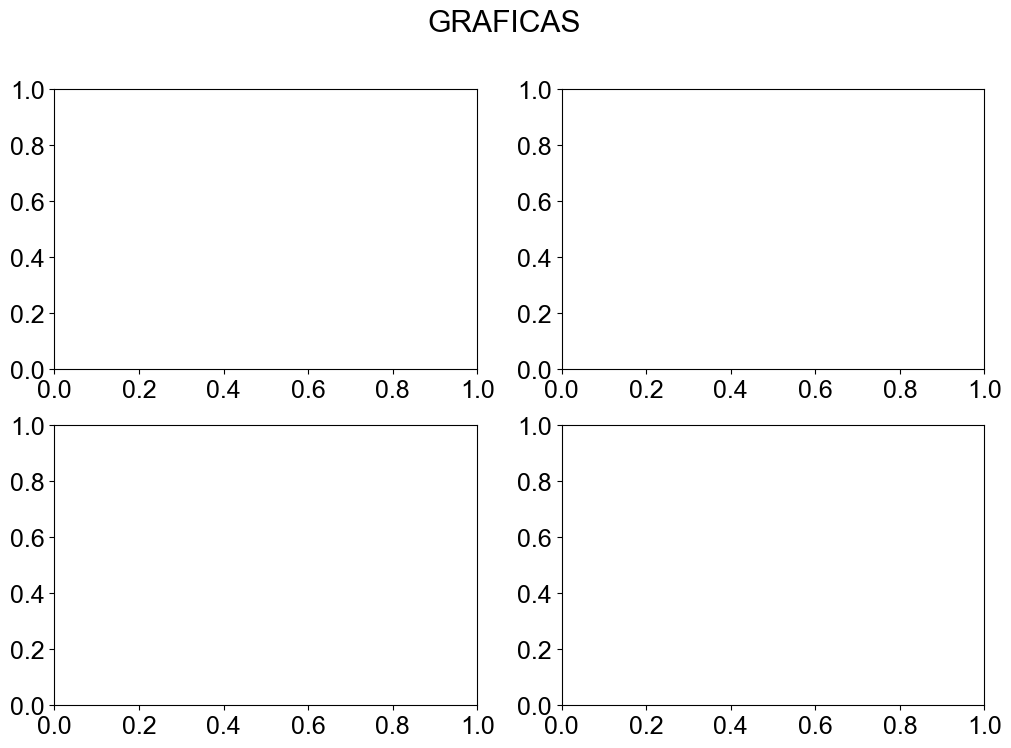

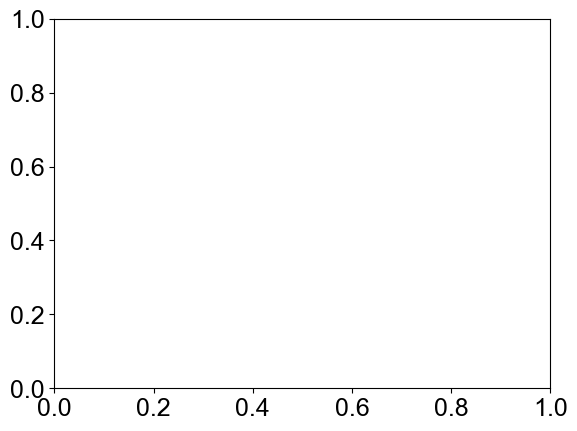

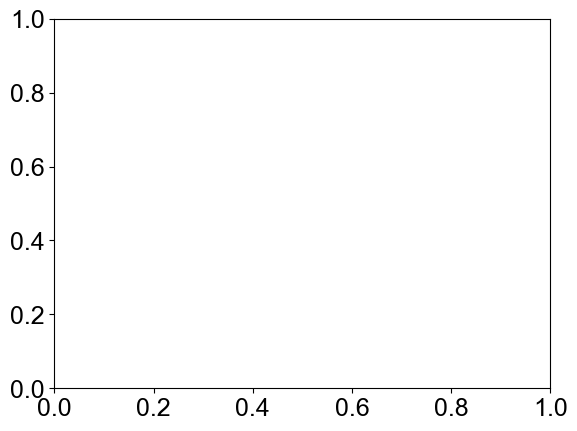

In [19]:
# Creamos figura y axes
fig,axs = plt.subplots(nrows=2,ncols=2, figsize=(12,8), )# creamos la figura que gusrada los arrays en axs
fig.suptitle("GRAFICAS");  
primera = axs[0,0]
# Calcula la densidad poblacional
cf["densidad_poblacional"] = cf["population_total"] / cf["area_total_km2"]

# Ordena el dataframe por densidad poblacional
cf= cf.sort_values("densidad_poblacional", ascending=False).head(5)

# Crear el gráfico de barras
plt.subplots()

#colores
colores =["Blue","gray", "olive", "brown", "purple"]

# Crear barras
result = ax.bar(cf["city"], cf["densidad_poblacional"], color = colores, width=0.7, alpha =0.7)

# Añade el número de habitantes a cada barra, estableciendo la x en el centro de la barra y la y a la altura de la barra, centrando el texto y alinenado el mismo con la barra
for i, population in enumerate(cf['population_total']):
    bar = result[i]
    alturay = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, alturay, f'{population:,}', ha='center', va='bottom')


#configurar grafico
ax.set_xlabel=("ciudades")
ax.set_ylabel=("Densidad Poblacional (habitantes por km²)")
ax.set_title= ("ciudades mas pobladas de california")

#2 GRAFICA
segunda = axs[0,1]
# Ajustar el tamaño de la figura
plt.subplots()

# Crear el histograma del área total ocupada por las ciudades
ax[0,1].hist(cf['area_total_km2'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)

# Configurar el gráfico
ax.set_xlabel('Área Total (km²)')
ax.set_ylabel('numero de ciudades')
ax.set_title('Histograma del Área Total Ocupada por Ciudades')

# Cambiar la fuente y el tamaño del texto
font = {'family': 'Bradley Hand ITC', 'size': 18}
plt.rc('font', **font)

#3 grafica
tercera = axs[1,0]
# Configurar el estilo de fuente
font_properties = {'family': 'Arial', 'weight': 'small', 'size': 8}
plt.rcParams['font.family'] = 'Arial'

#  outliers
y1=(10,100)  # Primer outlier
y2=(15 , 85)   # Segundo outlier

 #Dispersion, barra de colores
ciudad, agua = cf["population_total"], cf["area_water_km2"]

#creo la figura
plt.figure(figsize=(10,10), dpi=100, ax=axs[1,0])
sc=plt.scatter(ciudad, agua, c= cf.area_water_km2,  marker="o", cmap="viridis", linewidth = 0 , alpha = 0.6)

#establezvo las etiquetas
plt.xlabel("poblacion total")
plt.ylabel("area de agua (km2)")
plt.colorbar(sc, label="color")# el colorbar es la barra de colores que sale como una leyenda a la derecha cf.area_water_km2 acepta formulas en latex con markdown
plt.clim(45,78);# con esto se le pone el limite de colores que usara colorbar


# Fake legend
for agua in [60, 20, 0.012]:
    plt.scatter([],[], c ="g", alpha = 0.9, s =agua,label=str(agua))

plt.legend(frameon=False, title = "Area de poblacional de agua");

#grafica 4
cuarta= axs[1,1]

plt.figure()

# Utiliza el método boxplot de Pandas
cf.boxplot(column='elevation_m', vert=False, patch_artist=True)

# Ajusta el diseño del gráfico
plt.title('Diagrama de Cajas de Alturas de Ciudades')
plt.xlabel('Altura (metros)')
plt.ylabel('Ciudad')


plt.show()

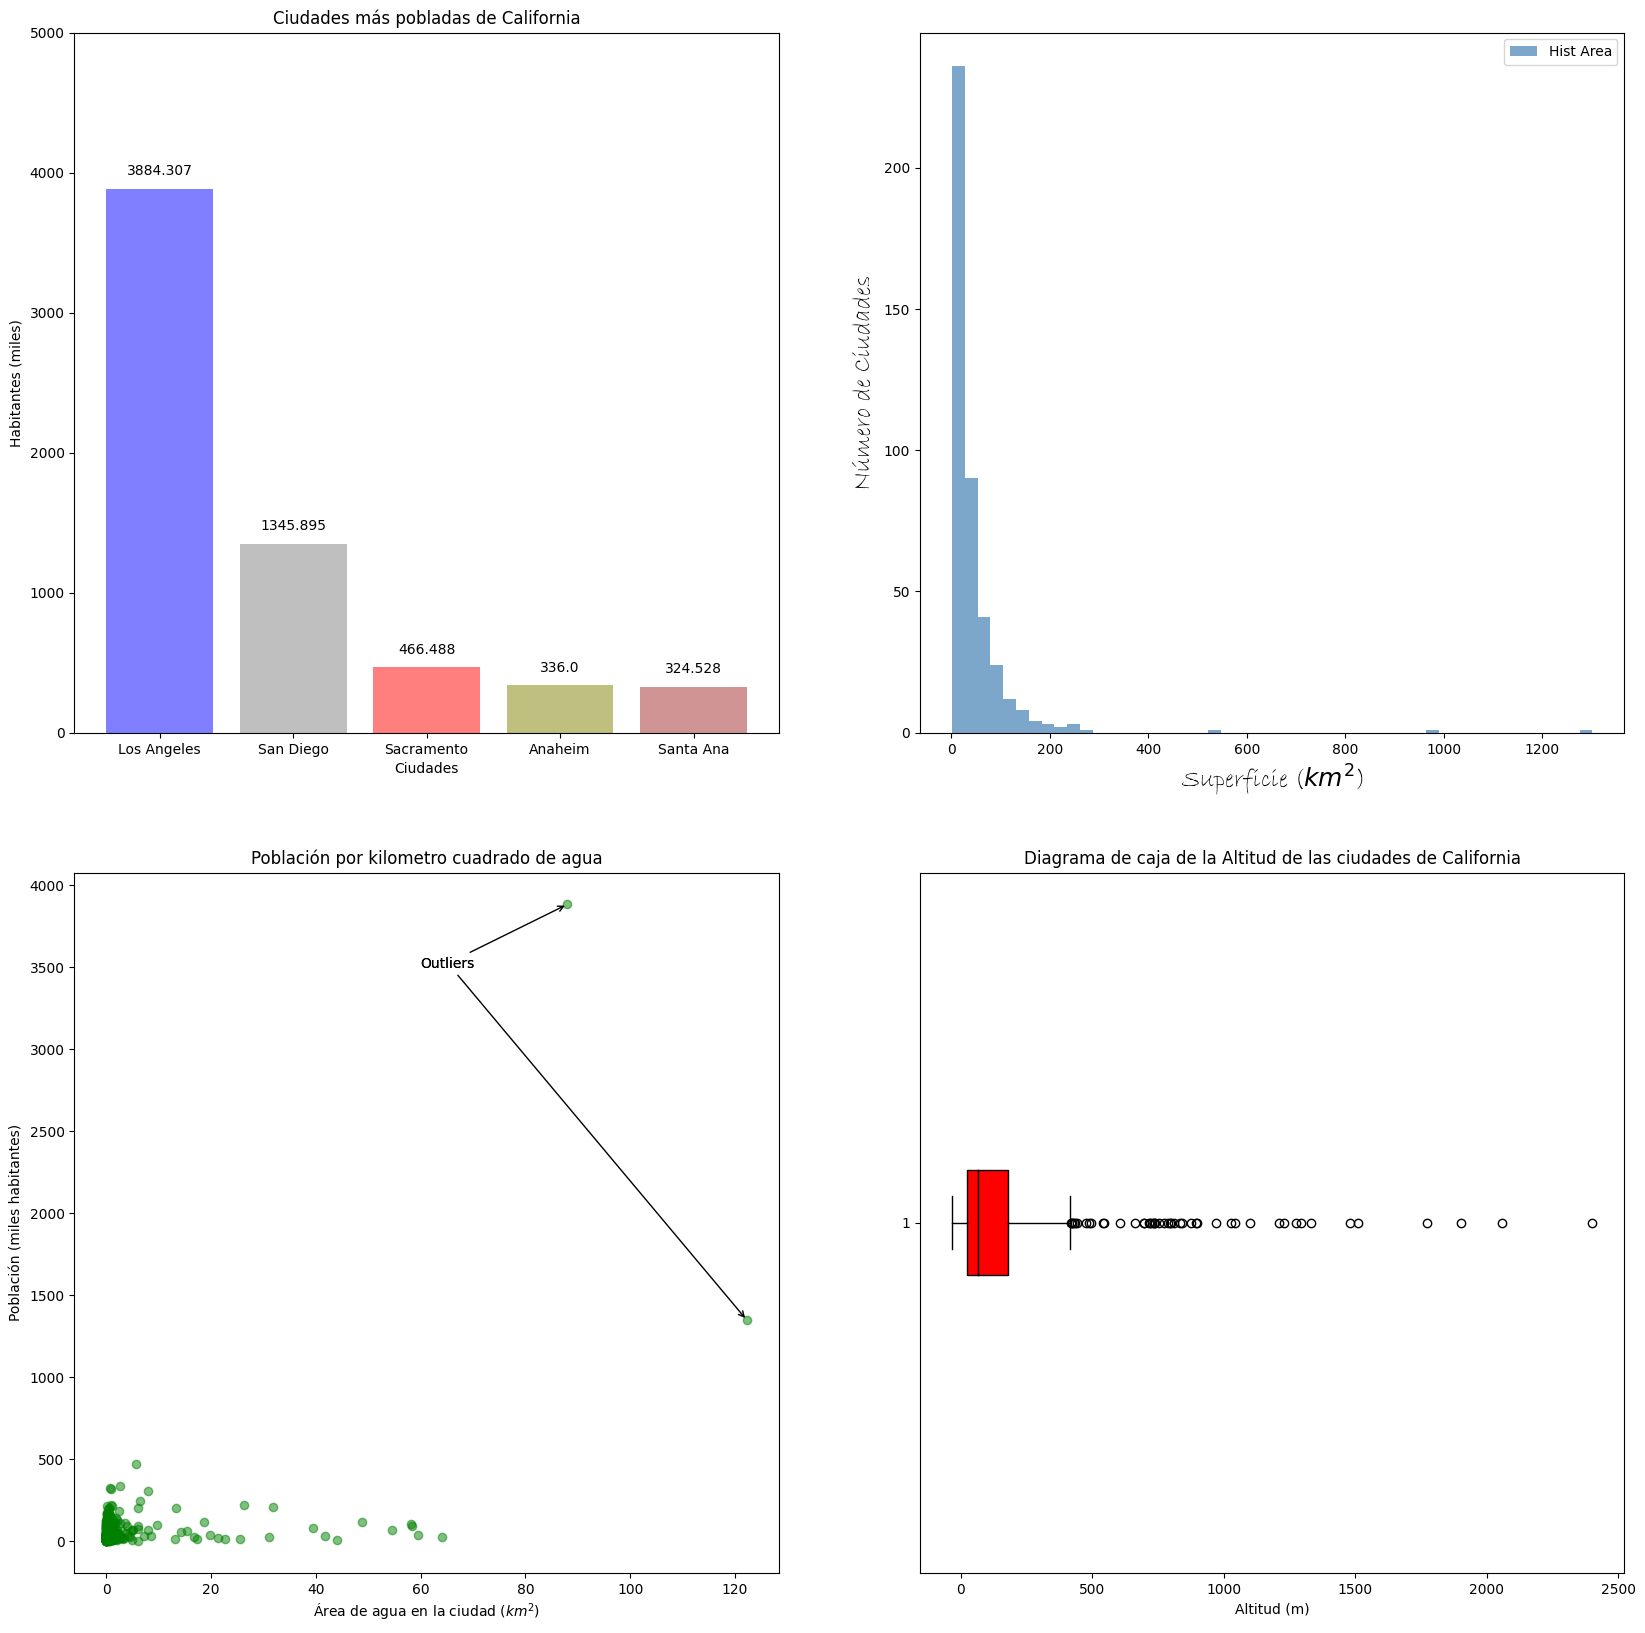

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

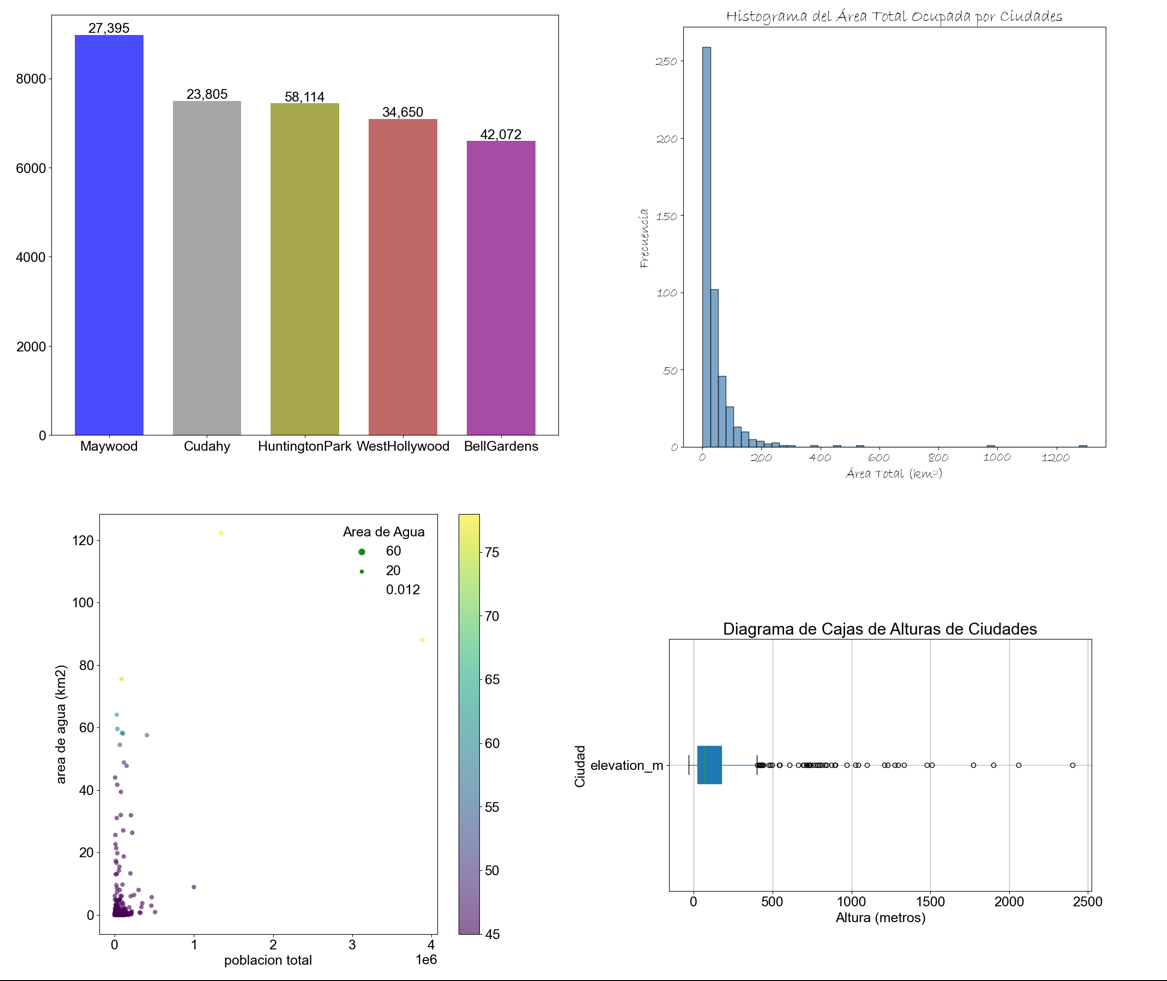